In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
#pip install yfinance

In [2]:
import yfinance as yfin
yfin.pdr_override()

In [ ]:
#pip install pandas_datareader

In [3]:
from pandas_datareader import data as pdr

In [4]:
#df=pd.read_csv('AAPL.csv')
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end='2019-12-17')
print(df)

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-01-03  14.621429  14.732143  14.607143  14.686786  12.482923  302220800
2012-01-04  14.642857  14.810000  14.617143  14.765714  12.550014  260022000
2012-01-05  14.819643  14.948214  14.738214  14.929643  12.689339  271269600
2012-01-06  14.991786  15.098214  14.972143  15.085714  12.821992  318292800
2012-01-09  15.196429  15.276786  15.048214  15.061786  12.801654  394024400
...               ...        ...        ...        ...        ...        ...
2019-12-10  67.150002  67.517502  66.464996  67.120003  65.565010   90420400
2019-12-11  67.202499  67.775002  67.125000  67.692497  66.124260   78756800
2019-12-12  66.945000  68.139999  66.830002  67.864998  66.292755  137310400
2019-12-13  67.864998  68.824997  67.732498  68.787498  67.193893  133587600
2019-12

In [5]:
# Create a function for calculation Moving Average(MA)
def MA(data,period=30,column='Close'):
  return data[column].rolling(window=period).mean()

In [6]:
# Create a function for calculation Exponential Moving Average(EMA)
def EMA(data,period=30,column='Close'):
  return data[column].ewm(span=period).mean()


In [7]:
# Create two new columns for storing the 20 day and 50 day MA
df['MA20']=MA(df,20)
df['MA50']=MA(df,50)

In [8]:
# Create two new columns for storing the 20 day and 50 day MA
df['EMA20']=EMA(df,20)
df['EMA50']=EMA(df,50)

In [9]:
# Get the buy and sell signals

df['Signal']=np.where(df['MA20']>df['MA50'],1,0)
df['Position']=df['Signal'].diff()

df['Buy']=np.where(df['Position']==1, df['Close'] , np.NAN)
df['Sell']=np.where(df['Position']==-1, df['Close'], np.NAN)

In [10]:
# Get the buy and sell signals

df['Signal']=np.where(df['EMA20']>df['EMA50'],1,0)
df['Position']=df['Signal'].diff()

df['Buy']=np.where(df['Position']==1, df['Close'] , np.NAN)
df['Sell']=np.where(df['Position']==-1, df['Close'], np.NAN)

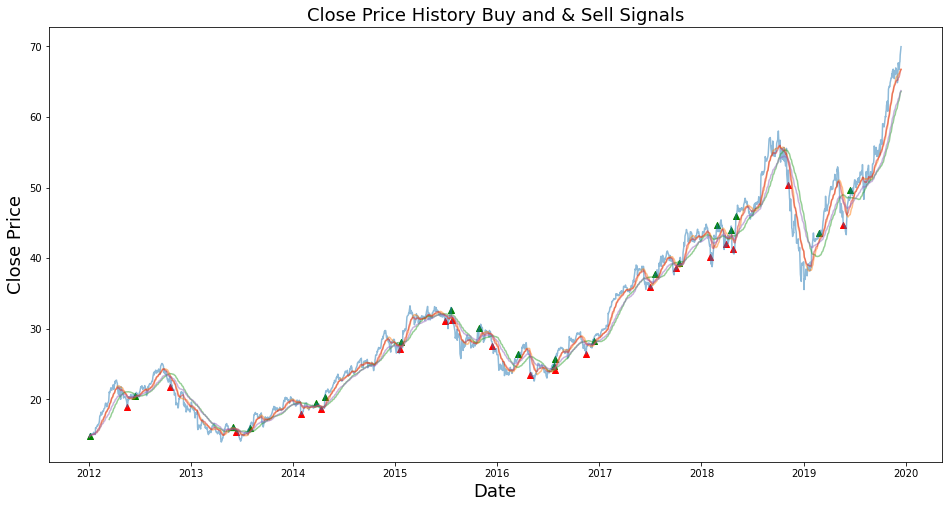

In [11]:
#Show the Close price with the MA ,WMA,EMA and Buy and Sell signals
plt.figure(figsize=(16,8))
plt.title('Close Price History Buy and & Sell Signals' , fontsize=18)
plt.plot(df['Close'], alpha=0.5 , label='Close')
plt.plot(df['MA20'], alpha=0.5 , label='MA20')
plt.plot(df['MA50'], alpha=0.5 , label='MA50')
plt.plot(df['EMA20'], alpha=0.5 , label='EMA20')
plt.plot(df['EMA50'], alpha=0.5 , label='EMA50')


plt.scatter(df.index,df['Buy'], alpha=1, label='Buy Signal', marker='^',color='green')

plt.scatter(df.index,df['Sell'], alpha=1, label='Sell Signal', marker='^',color='red')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()